<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/ase3001_exercises_no_surprises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# No surprises

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computation lab, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Jiwoo Choi (jiwoochoi@inha.edu) </div>_

<br>

___

<br>

In this section, we will load a sound sample (`.wav` file), and examine which musical notes (or chords) the song consists of. For your information, the frequency-note matching table can be found via Googling, for example from, https://en.wikipedia.org/wiki/Piano_key_frequencies.

<br>

We will first need to import the following modules, the third for loading `.wav` file, and the last for playing it.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

<br>

In this lecture, we will access data files which are uploaded on the Google drive. In order to do this, we will have to mount the Goodle drive first.

1) Run the following cell. Then you will be presented with a link and will be asked to enter your authorization code.

2) Click on the link to log in again with your Inha University account, which you are working with. Then you will be presented with the authorization code.

3) Copy the authorization code, and paste it into the blank.

> _Note that this step is necessary ONLY when you work on Google Colab environment._

The following pieces of code loads the first 12 second sound clip of a song that you've probably heard of.
The loaded data contains the sampling rate, `data[0]`, and the time-series signals from stereo channels, `data[1]`.

--2024-10-09 14:36:32--  https://jonghank.github.io/ase3001/files/no_surprises_clip.wav
Resolving jonghank.github.io (jonghank.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jonghank.github.io (jonghank.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2274768 (2.2M) [audio/wav]
Saving to: ‘no_surprises_clip.wav’

no_surprises_clip.w 100%[===================>]   2.17M  --.-KB/s    in 0.07s   

2024-10-09 14:36:33 (30.7 MB/s) - ‘no_surprises_clip.wav’ saved [2274768/2274768]



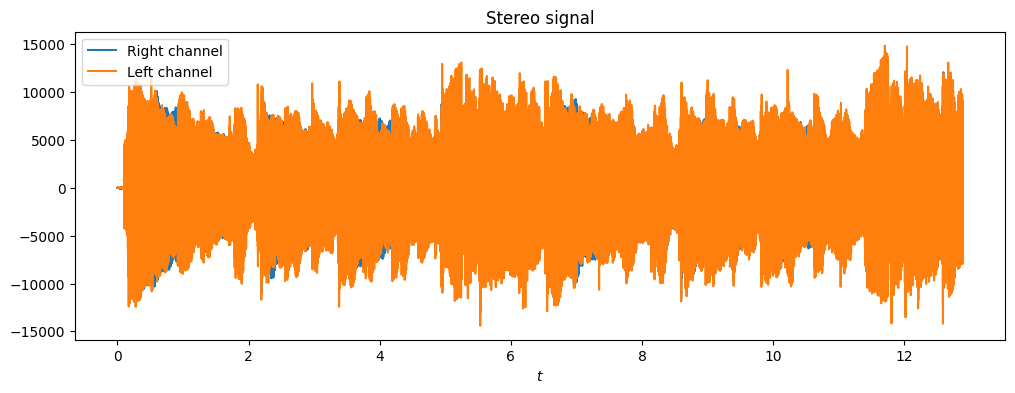

In [23]:
# The wave file can be downloaded from
# https://jonghank.github.io/ase3001/files/no_surprises_clip.wav
!wget -O no_surprises_clip.wav https://jonghank.github.io/ase3001/files/no_surprises_clip.wav

data = wavfile.read('no_surprises_clip.wav')
framerate = data[0]
sounddata = data[1]
t = np.arange(0,len(sounddata))/framerate

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t,sounddata[:,0], label='Right channel')
plt.plot(t,sounddata[:,1], label='Left channel')
plt.xlabel(r'$t$')
plt.title('Stereo signal')
plt.legend()
plt.show()

Audio([sounddata[:,1], sounddata[:,0]], rate=framerate, autoplay=True)

<br>

The code below will merge the stereo channel data into a mono data, just by adding them. From now on we will work on this mono data.

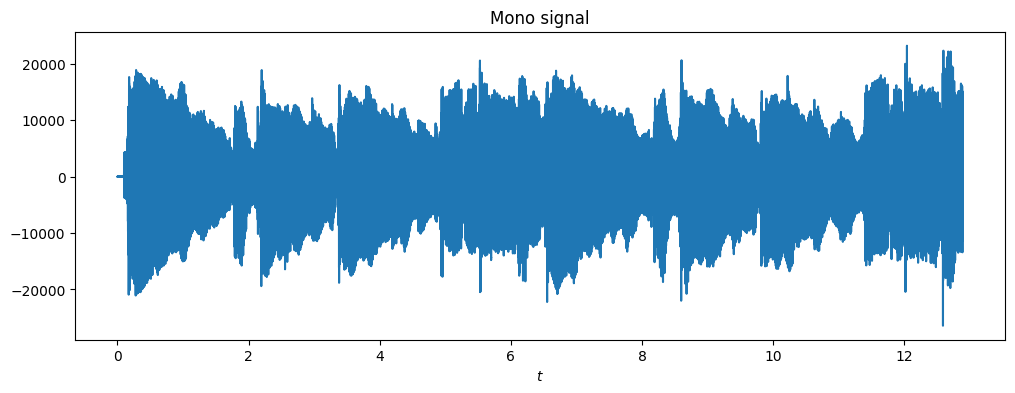

In [75]:
mono = sounddata@[1,1]

plt.figure(figsize=(12,4), dpi=100)
plt.plot(t, mono)
plt.xlabel(r'$t$')
plt.title('Mono signal')
plt.show()

Audio(mono, rate=framerate, autoplay=True)

<br>

___

<br>

_**(Problem 1)**_
The sample repeats the same riff twice. Crop the sample from $0 \le t \le 6.5$, and save it to a new time-series, $x^\text{cut}(t)$. Through Fourier analysis, you will be able to identify several dominant musical notes that appear in this part. What are they? List the five most dominant ones.

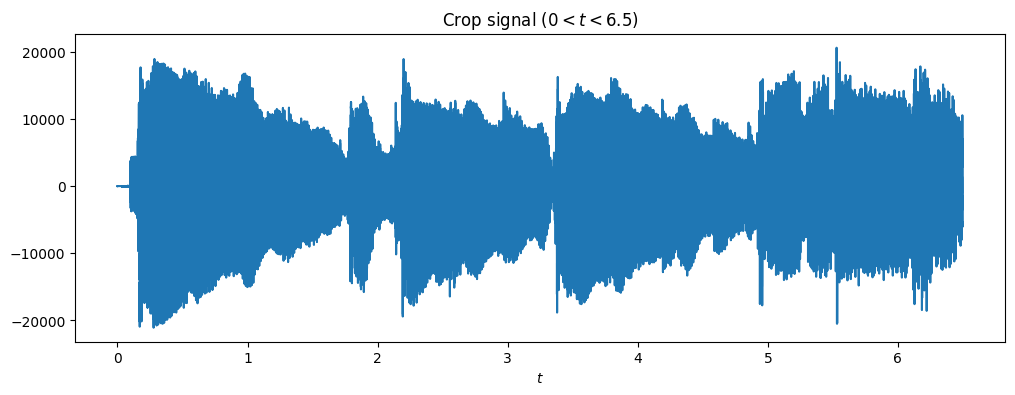

In [25]:
t_cut = t[t<=6.5]
x_cut = mono[t <= 6.5]
plt.figure(figsize=(12,4), dpi=100)
plt.plot(t_cut,x_cut)
plt.xlabel(r'$t$')
plt.title('Crop signal $(0 < t<6.5)$')
plt.show()

3753.6828316464507
3753.6828316464507
{5143.49519526435: 557, 17080.564484465234: 559, 9953.967456393217: 560, 4479.860908116698: 561, 3753.6828316464507: 5599}


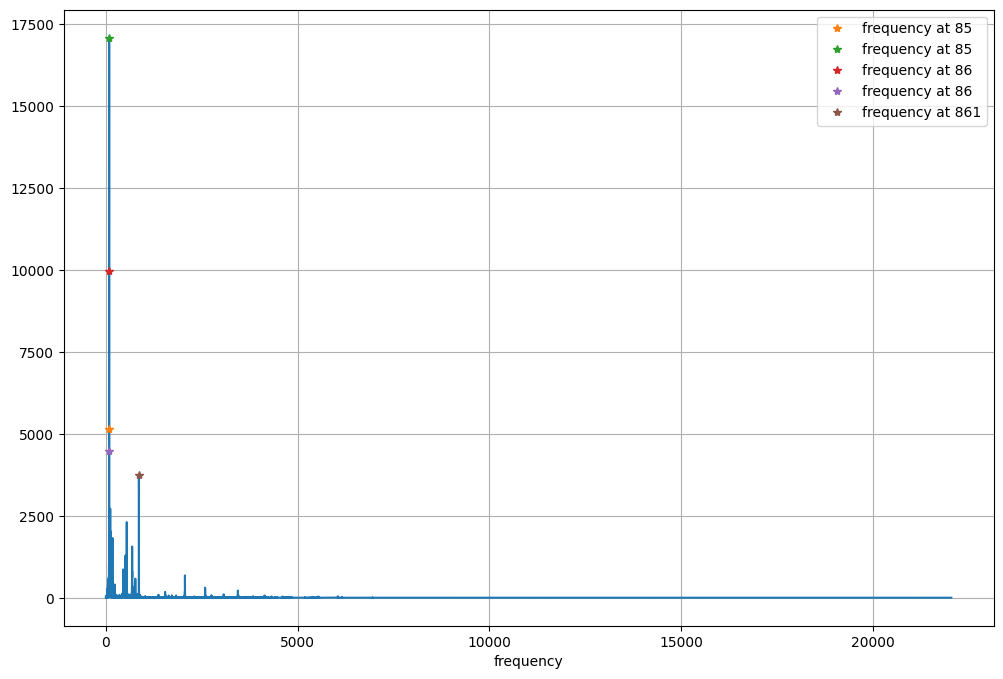

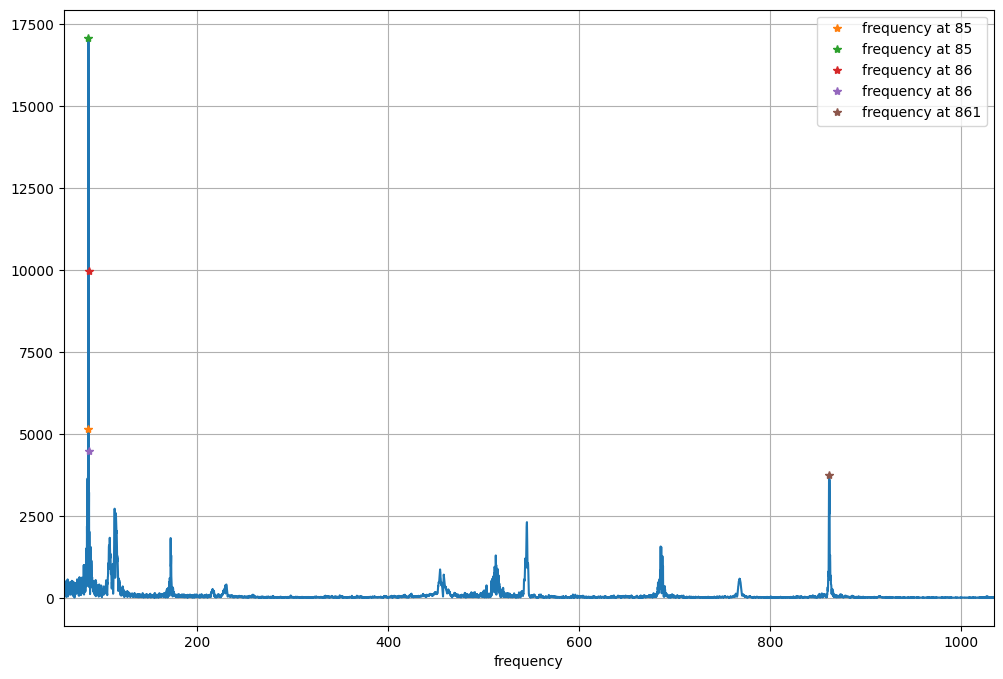

In [85]:

def fft_st_ed(start: float, end: float, mono, fs, dominant_num: int):
    x_1 = mono[int(start * fs):int(end * fs) + 1]
    N = len(x_1)
    df = fs / N
    f = np.arange(0, N) * df
    dt = 1 / fs
    X_1 = np.fft.fft(x_1) * dt
    X_1_rec = X_1[0:int(len(X_1) / 2) + 1]
    S = set(sorted(np.abs(X_1_rec.copy()), reverse=True)[:dominant_num])
    result = {}
    for i in range(len(np.abs(X_1_rec))):
        if np.abs(X_1_rec)[i] in S:
            result[np.abs(X_1_rec)[i]] = i


    min_in_max = sorted(result.items())[0][0]
    print(min_in_max)
    X_recon = X_1.copy()
    X_recon[np.abs(X_recon) < min_in_max] = 0
    x_recon = np.fft.ifft(X_recon).real * fs
    return x_1, x_recon, result, X_1, X_recon


def plot_fft_rec(x,x_recon,start,end,x_lim):
  plt.figure(figsize = (12,8))
  plt.plot(np.linspace(start,end,len(x)),x,label ="original data")
  plt.plot(np.linspace(start,end,len(x)),x_recon,label = "reconstructed data with fft")
  plt.xlabel("t")
  plt.xlim(x_lim)
  plt.legend()
  plt.show()





def plot_fft_frec(x_1,X_1,X_recon,result,fs,is_graph_lim_x):
  N = len(x_1)
  df = fs/N
  f = np.arange(0,N)*df
  plt.figure(figsize = (12,8))
  plt.plot(f[0:int(N/2)+1],np.abs(X_1)[0:int(N/2) + 1])
  for i in result:
    plt.plot(f[result[i]],np.abs(X_recon)[result[i]],"*",label = f"frequency at {int(f[result[i]])}")
  plt.legend()
  max_mag = max(result,key=result.get)
  min_mag = min(result,key=result.get)
  plt.xlabel("frequency")
  plt.ylabel("")
  if is_graph_lim_x:
    plt.xlim([0.7*f[result[min_mag]],1.2*f[result[max_mag]]])
    plt.grid()
    plt.show()

  else:
    plt.grid()
    plt.show()





start = 0
end = 6.5
dominant_num = 5
x_1, x_recon,result,X_1,X_recon =  fft_st_ed(start,end,mono,data[0],dominant_num)
print(min(result))
print(result)
plot_fft_frec(x_1,X_1,X_recon,result,data[0],False)
plot_fft_frec(x_1,X_1,X_recon,result,data[0],True)

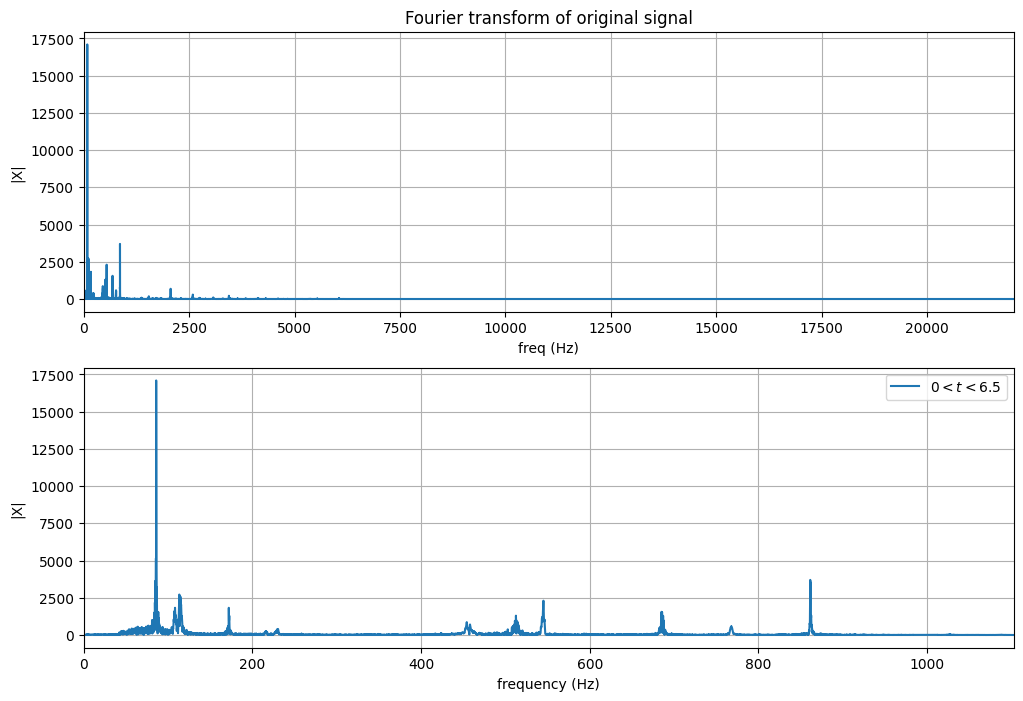

In [ ]:
# your code here


<br>

___

<br>

_**(Problem 2)**_
The sample includes performances from two instruments. Separate the performances of the two instruments based on $f_\text{threshold}=300\text{ Hz}$, saving the sounds heard in the range below $f_\text{threshold}$ in $x_\text{bass}$ and the sounds heard in the range above $f_\text{threshold}$ in $x_\text{guitar}$. Play both and check if the sounds of the two instruments are well-separated.

In [113]:
def fft_threshold(start: float, end: float, mono, fs,threshold,is_bigger):
    x_1 = mono[int(start * fs):int(end * fs) + 1]
    N = len(x_1)
    dt = 1 / fs
    X_1 = np.fft.fft(x_1) * dt
    df = fs / N
    f = np.arange(0, N) * df
    X_recon = X_1.copy()
    if is_bigger==">":
      X_recon[np.abs(f) > threshold] = 0
      x_recon = np.fft.ifft(X_recon).real * fs
    else:
      X_recon[np.abs(f) < threshold] = 0
      x_recon = np.fft.ifft(X_recon).real * fs
    return x_recon, X_recon


x_recon_1, X_recon_1 = fft_threshold(0,6,mono,data[0],300,">")
x_recon_2, X_recon_2 = fft_threshold(0,6,mono,data[0],300,"<")

Audio(x_recon_1, rate=data[0], autoplay=True)

In [114]:
Audio(x_recon_2, rate=data[0], autoplay=True)

<br>

___

<br>

_**(Problem 3)**_ Now your job is to make a software that receives a musical sound sample and generates sheet music for the sound. This can be achieved by performing Fourier analysis on moving windowed segments of the audio signals, and displaying the results as a two-dimensional frequency plot over time, as described below.

You can divide the audio data, $x^\text{cut}$ into segments of size `n_wdw` and create an array `fft_in` with intervals of size `n_itv` to perform the Fourier Transform.

The input matrix for the Fourier transform is defined as:

$$
{\tt{fft}_\tt{in}} = \bmat{ y^{(0)} & y^{(n_\text{itv})} & y^{(2n_\text{itv})} & \cdots & y^{(mn_\text{itv})} } \in \mathbb{R}^{n_\text{wdw}\times(m+1)}
$$

where,

$$
    \begin{aligned}
        y^{(k)} &= \bmat{ x^\text{cut}_k & x^\text{cut}_{k+1} & \cdots & x^\text{cut}_{k+n_\text{wdw}-1} }^T
        \in \mathbb{R}^{n_\text{wdw}}\\
    m &=  \left \lfloor \frac{s-n_\text{wdw}}{n_\text{itv}}\right \rfloor
    \end{aligned}
$$

Save the result into an array named `fft_out`.

<br>

<center>
<img src="https://jonghank.github.io/ase3001/files/itv_window.png" width="600">
</center>

In [ ]:
def STFT__Make_FFT_IN(start: float, end: float,mono, fs,n_wdw,n_itv):
    x_1 = mono[int(start * fs):int(end * fs) + 1]
    N = len(x_1)
    dt = 1 / fs
    X_1 = np.fft.fft(x_1) * dt
    df = fs / N
    f = np.arange(0, N) * df
    X_recon = X_1.copy()
    m = (N - n_wdw)/n_itv
    FFT_IN = np.zeros([n_wdw,m+1])
    for i in range(m+1):
      y_k = x_1[i*n_itv : i*n_itv + n_itv]
      FFT_IN[:,i] =  y_k
    return FFT_IN
STFT__Make_FFT_IN(0,6,mono, data[0],n_wdw,n_itv)

In [ ]:
# your code here


<br>

A spectogram is a plot of frequency intensities, which were obtained via Fourier analyses, over time. A Short-Time Fourier Transform (STFT) is used to create a spectogram. The STFT involves dividing the signal into fixed length segments (windows) and performing a Fourier transform on each segment to obtain the frequency at that time.

Plot a spectogram with your result saved in `fft_out` using `matplotlib.pyplot.pcolormesh`.

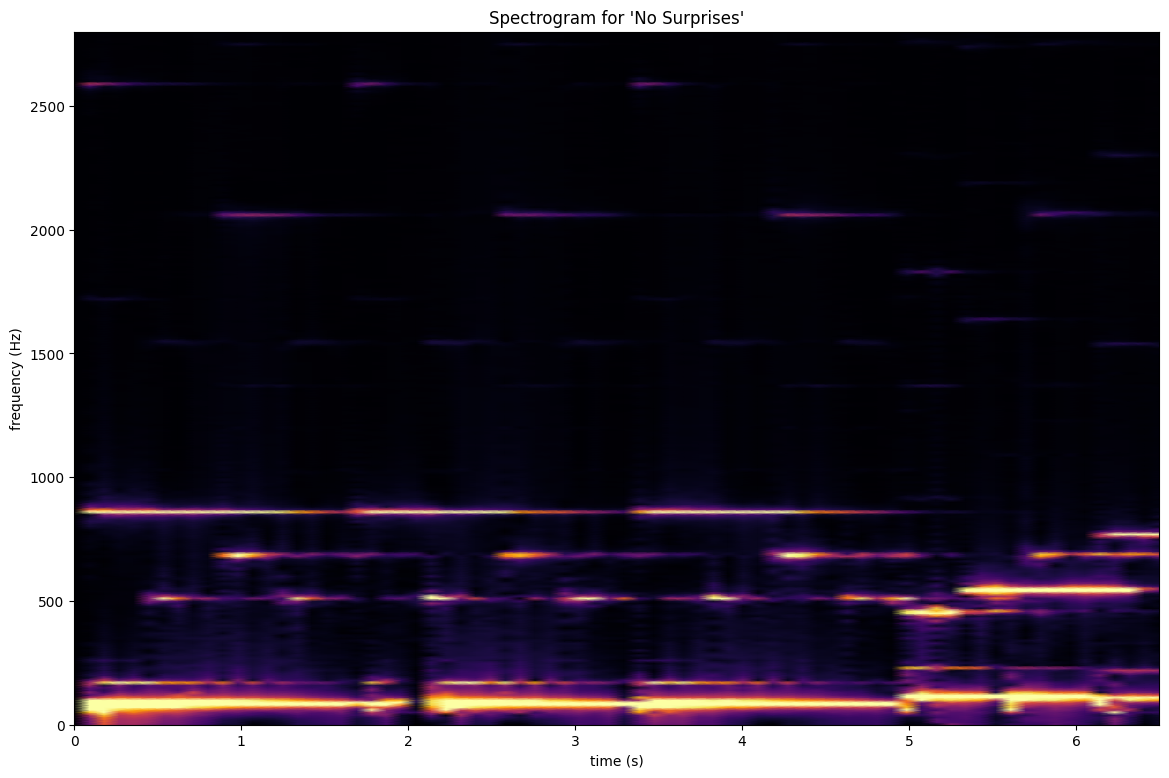

In [ ]:
# your code here


<br>

___

<br>

_**(Problem 4)**_
The piano key number N refers to a number defined to represent the keys on a standard piano keyboard, where key number 1 represents the leftmost key (A0) producing the lowest note on a standard 88-key piano, and key number 88 represents the rightmost key (C8), producing the highest note. A difference of one between key numbers corresponds to a half-step difference in pitch (see Piano key frequencies for reference). For example, key number 49 represents the middle A (A4) on the piano.

More specifically, the frequency of the note produced by a piano key number $N$ follows an exponential relationship as follows:

$$
f_N = 440\times 2^\frac{N-49}{12}.
$$

As $N$ increases, the note’s frequency rises exponentially. Each octave consists of 12 keys, corresponding to the 12 semitones in Western music. When you move up by one octave, the frequency of the note doubles. This shows the exponential increase in frequency as you move up the keyboard.

<br>

Overlay the frequencies corresponding to all the piano keys from key 37 up to 3 octaves (36 keys) on the spectrogram obtained earlier, and then identify the guitar notes that appear during the first 6.5 seconds of “No Surprises.” (Notice that Ed O'Brien, the band's rhythm guitarist who recorded this song, very slightly down-tuned his guitar.)

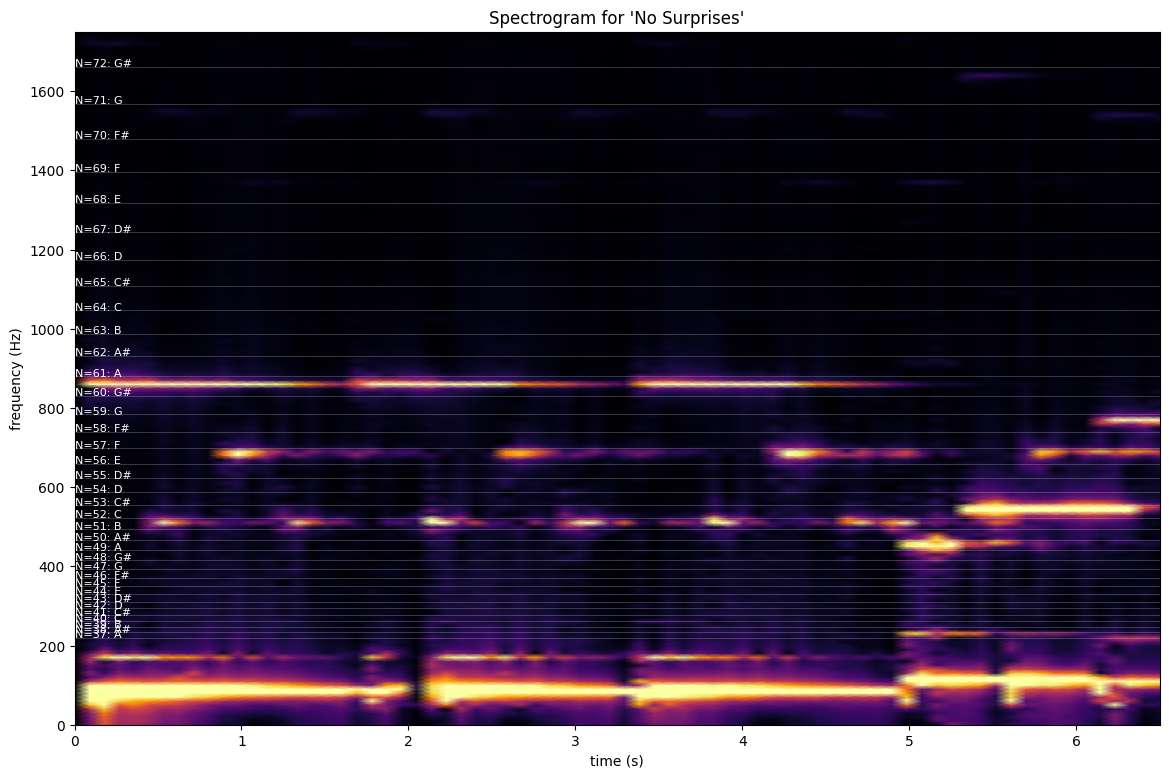

In [ ]:
# your code here
